#### Import libraries

In [87]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Assets

In [88]:
path1 = "./assets/sample.png"
path2 = "./assets/dino.png"

#### Set RGB Channels and initialize label value

In [89]:
R_channel = 2
G_channel = 1
B_channel = 0

curr_label = 2

#### Read and display image

In [90]:
img1 = cv2.imread(path1)

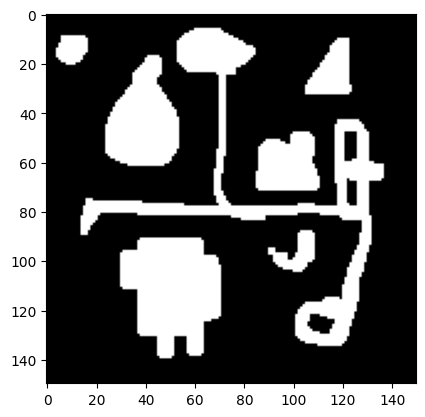

In [91]:
plt.imshow(img1)

In [92]:
img = img1.copy()

In [93]:
# for row in range(img.shape[0]):
#     for col in range(img.shape[1]):
        
#         ...

#### Create label matrix for binary representation of image

In [94]:
label = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        try:
            if img[i][j][B_channel]:
                label[i][j] = 1
        except Exception as e:
            print(f"Exception at ({i}, {j}): {e}")



#### Component labelling the Image and mapping relations between labels

In [95]:
objs = []

for row in range(len(label)):
	for col in range(len(label[0])):
		
		if label[row][col] and row and col:
			if not label[row - 1][col] and not label[row][col - 1]:
				label[row][col] = curr_label
				curr_label += 1

			else:
				if label[row][col -1] != label[row - 1][col] and label[row][col -1] and label[row - 1][col]:
					objs.append({label[row][col-1], label[row-1][col]})

				if label[row - 1][col]:
					label[row][col] = label[row - 1][col]
				else:
					label[row][col] = label[row][col - 1]

				if label[row][col - 1] and label[row][col - 1] < label[row][col]:
					label[row][col] = label[row][col - 1]



		elif col and not row and label[row][col]:
			if label[row][col - 1]:
				label[row][col] = label[row][col - 1]
			else:
				label[row][col] = curr_label
				curr_label += 1


		elif not col and label[row][col]:
			if label[row - 1][col]:
				label[row][col] = label[row - 1][col] 
			else:
				label[row][col] = curr_label
				curr_label += 1


#### Print labelled image

In [96]:
for i in label:
    for j in i:
        print(f"{j:02}", end='')
    print()

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Convert set into frozen set to make it hashable

In [ ]:
objs_set = list(set(frozenset(item) for item in objs))
objs_set

#### Find minimal equivalence set from objs_set

In [98]:
final_objs = []
objs2 = [set(x) for x in objs_set]

while objs_set:
    curr_obj = objs_set.pop()
    merged = True
    while merged:
        merged = False
        rest = []
        for other in objs_set:
            if not curr_obj.isdisjoint(other):
                curr_obj |= other
                merged = True
            else:
                rest.append(other)
        objs_set = rest
    final_objs.append(frozenset(curr_obj))



In [99]:
for i in final_objs:
    print(i)

frozenset({64, 2, 67, 3, 4, 70, 6, 72, 7, 9, 73, 74, 75, 76, 78, 79, 77, 80, 83, 84, 81, 82, 42, 44, 51, 52, 53, 55, 56, 57, 58, 61})
frozenset({32, 8, 10, 12, 13, 15, 17, 19, 21, 24, 26, 28, 29, 30})
frozenset({66, 68, 62, 63})
frozenset({16, 18, 20, 22, 23, 25, 27, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43})
frozenset({48, 49, 50, 54, 45, 46, 47})
frozenset({65, 69, 71, 59, 60})
frozenset({11, 5, 14})


#### Color map for a maximum of 7 object

In [100]:
colors_bgr = [
    [0, 0, 255],     # Red
    [0, 255, 0],     # Green
    [255, 0, 0],     # Blue
    [0, 255, 255],   # Yellow
    [255, 0, 255],   # Purple (Magenta)
    [255, 255, 0],   # Cyan
    [203, 192, 255],  # Pink
    [0, 0, 0]
]

colors_bgr = [np.array(np.uint8(x)) for x in colors_bgr]

#### Second Pass of component labelling

In [101]:
for row in range(len(label)):
	for col in range(len(label[0])):
		
		if label[row][col]:

			for obj in final_objs:
		
				if label[row][col] in obj:
					label[row][col] = min(obj)

#### Print the labelled image after applying minimal equivalence set 

In [102]:
for i in label:
    for j in i:
        print(f"{j:02}", end='')
    print()

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

#### Color the objects based on their label value

In [103]:
def get_color(label):
	for objidx in range(len(final_objs)):
		if label in final_objs[objidx]:
			return colors_bgr[objidx]

	
	return colors_bgr[-1]

In [104]:
for row in range(len(label)):
	for col in range(len(label[0])):
		if label[row][col] != 0:
			img[row][col] = get_color(label[row][col])

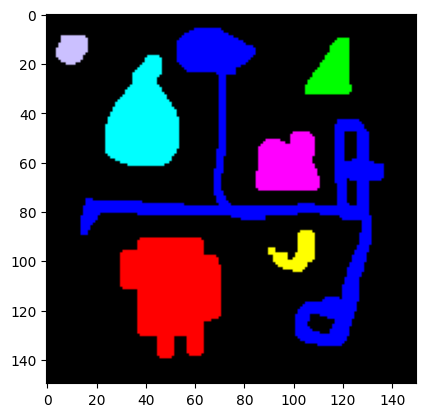

In [105]:
plt.imshow(img)